In [60]:
##imports
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

In [61]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
from google.colab import drive
drive.mount('/content/drive')

input_folder = "/content/drive/MyDrive/21201307_momtaheena_chowdhury_l2-463"
output_folder= "/content/drive/MyDrive/21201307_momtaheena_chowdhury_l2-463"
target_size = (256, 256)

os.makedirs(output_folder, exist_ok=True)

files_nam = os.listdir(input_folder)
print("Images in source directory:", files_nam)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Images in source directory: ['rapunz.jpg', 'moana.jpg', 'pear.jpg', '4.jpeg', 'vol.jpg', 'dobby.jpg', 'dracula.jpg']


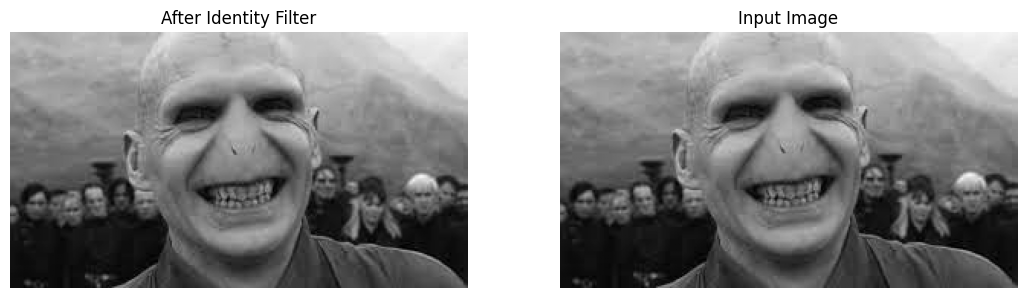

In [63]:
#task1

img_path = '/content/drive/MyDrive/21201307_momtaheena_chowdhury_l2-463/vol.jpg'
input_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

identity_filter = np.array([[1, 0, 0],
                            [0, 0, 0],
                            [0, 0, 0]])

identity_result = cv2.filter2D(input_img, -1, identity_filter)

plt.figure(figsize=(13, 8))
plt.subplot(1, 2, 2)
plt.title('Input Image')
plt.imshow(input_img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 1)
plt.title('After Identity Filter')
plt.imshow(identity_result, cmap='gray')
plt.axis('off')
plt.show()


Observation:Applying 3x3 identity kernel will not change the original picture as it does not change any pixel value.


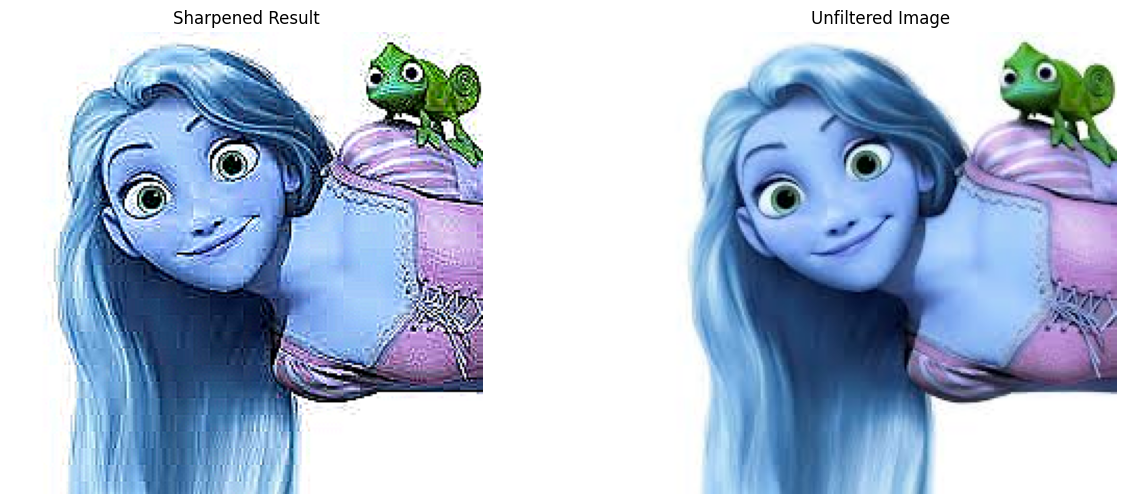

In [64]:
#TASK2

img_path = '/content/drive/MyDrive/21201307_momtaheena_chowdhury_l2-463/rapunz.jpg'
color_img = cv2.imread(img_path)

sharp_matrix = np.array([[ 0, -1,  0],
                         [-1,  5, -1],
                         [ 0, -1,  0]])

sharpened_output = cv2.filter2D(color_img, -1, sharp_matrix)

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 2)
plt.title('Unfiltered Image')
plt.imshow(color_img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 1)
plt.title('Sharpened Result')
plt.imshow(sharpened_output, cmap='gray')
plt.axis('off')
plt.show()


Observation:The sharpening kernel makes the pixels in the middle stand out more by making the pixels around them less important. This makes the picture sharper.

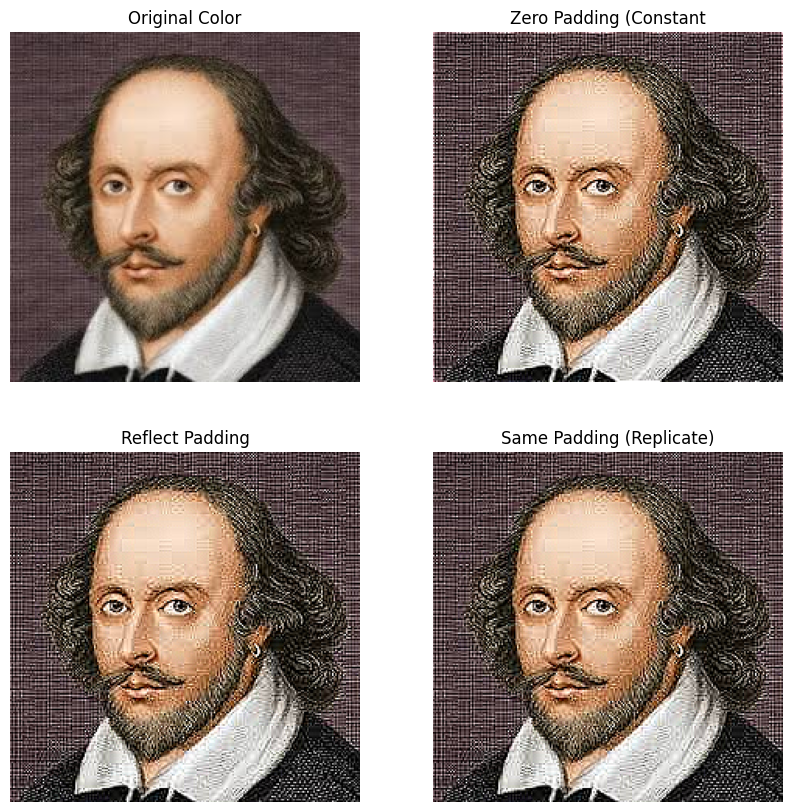

In [65]:
#TASK3
img_path = '/content/drive/MyDrive/21201307_momtaheena_chowdhury_l2-463/pear.jpg'
input_img = cv2.imread(img_path)

sharp_filter = np.array([[ 0, -1,  0],
                         [-1,  5, -1],
                         [ 0, -1,  0]])

res_constant = cv2.filter2D(input_img, -1, sharp_filter, borderType=cv2.BORDER_CONSTANT)
res_reflect = cv2.filter2D(input_img, -1, sharp_filter, borderType=cv2.BORDER_REFLECT)
res_replicate = cv2.filter2D(input_img, -1, sharp_filter, borderType=cv2.BORDER_REPLICATE)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.title('Original Color')
plt.imshow(cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Zero Padding (Constant')
plt.imshow(cv2.cvtColor(res_constant, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Reflect Padding')
plt.imshow(cv2.cvtColor(res_reflect, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Same Padding (Replicate)')
plt.imshow(cv2.cvtColor(res_replicate, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


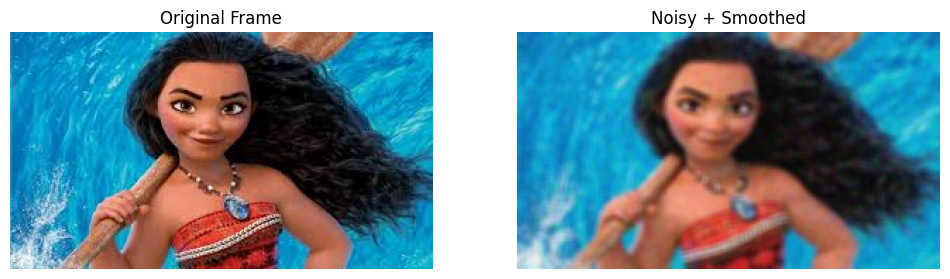

In [66]:
#TASK4
img_path = '/content/drive/MyDrive/21201307_momtaheena_chowdhury_l2-463/moana.jpg'
src_img = cv2.imread(img_path)

def apply_gaussian_noise(data, mean=5, sigma=20):
    h, w, ch = data.shape
    noise = np.random.normal(mean, sigma, (h, w, ch))
    noised = np.clip(data.astype(np.float32) + noise, 0, 255)
    return noised.astype(np.uint8)

distorted_img = apply_gaussian_noise(src_img)
smoothed_img = cv2.blur(distorted_img, (5, 5))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Frame')
plt.imshow(cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Noisy + Smoothed')
plt.imshow(cv2.cvtColor(smoothed_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


Observation:By making the picture float and cutting the output, Gaussian noise is added to the picture while the pixel values stay within a good range.

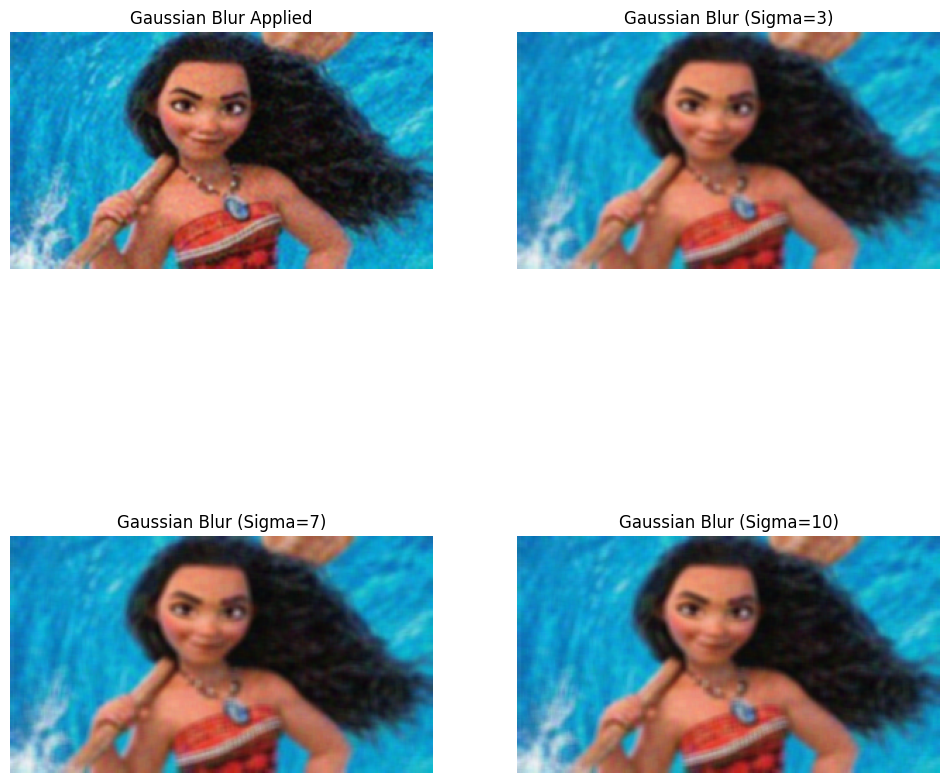

In [67]:
#TASK5
blur_base = cv2.GaussianBlur(distorted_img, (5, 5), 1)
blur_s3 = cv2.GaussianBlur(distorted_img, (5, 5), 3)
blur_s6 = cv2.GaussianBlur(distorted_img, (5, 5), 6)
blur_s9 = cv2.GaussianBlur(distorted_img, (5, 5), 9)

plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.title('Gaussian Blur Applied')
plt.imshow(cv2.cvtColor(blur_base, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Gaussian Blur (Sigma=3)')
plt.imshow(cv2.cvtColor(blur_s3, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Gaussian Blur (Sigma=7)')
plt.imshow(cv2.cvtColor(blur_s6, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Gaussian Blur (Sigma=10)')
plt.imshow(cv2.cvtColor(blur_s9, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


Observation:The images are getting increasingly hazy as Sigma increases. In this case, the image with the sigma 10 value is blurrier than the one with the sigma 3 value.

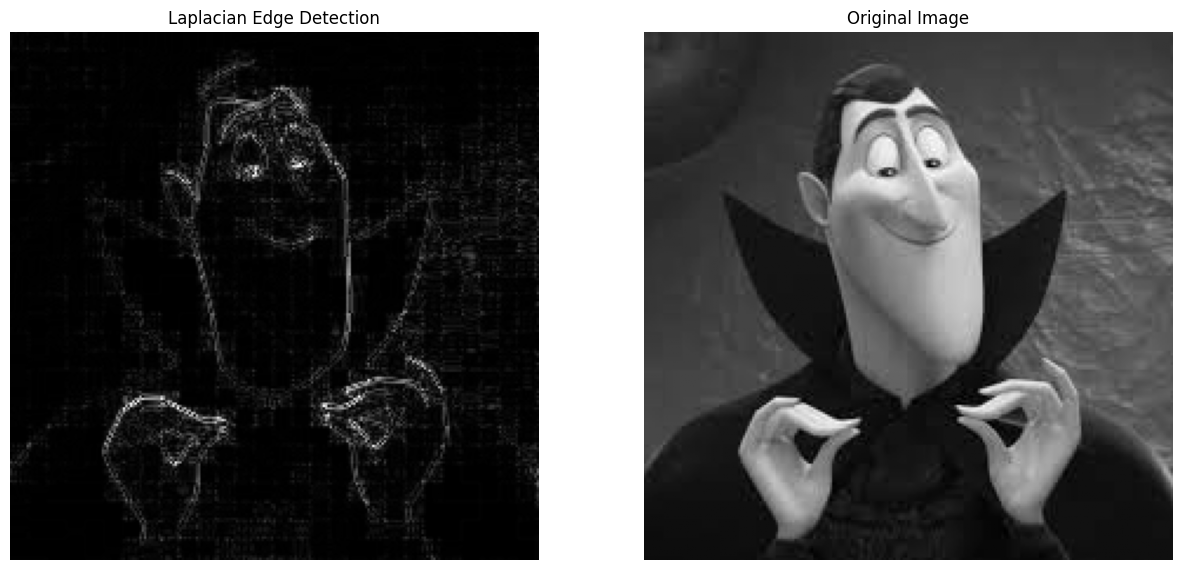

In [68]:
#TASK6
#TASK6
image_path = '/content/drive/MyDrive/21201307_momtaheena_chowdhury_l2-463/dracula.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

laplacian = cv2.Laplacian(image, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)

plt.figure(figsize=(15, 11))

# Original
plt.subplot(1, 2, 2)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

# Laplacian  image
plt.subplot(1, 2, 1)
plt.title('Laplacian Edge Detection')
plt.imshow(laplacian, cmap='gray')
plt.axis('off')

plt.show()


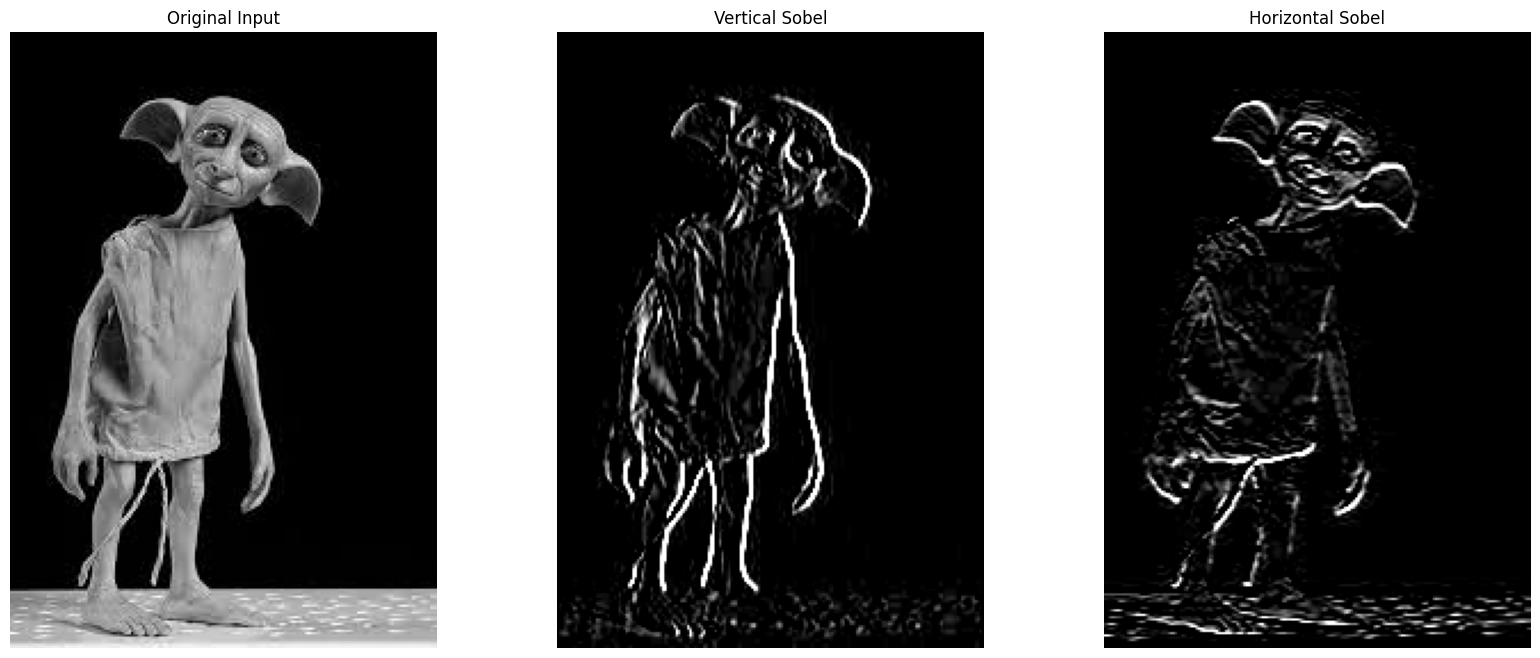

In [69]:
#TASK7

img_path = '/content/drive/MyDrive/21201307_momtaheena_chowdhury_l2-463/dobby.jpg'
INP_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

sobel_v = np.array([[1, 0, -1],
                    [2, 0, -2],
                    [1, 0, -1]])

sobel_h = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])

edge_v = cv2.filter2D(INP_img, -1, sobel_v)
edge_h = cv2.filter2D(INP_img, -1, sobel_h)

plt.figure(figsize=(20, 8))
plt.subplot(1, 3, 1)
plt.title('Original Input')
plt.imshow(INP_img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Vertical Sobel')
plt.imshow(edge_v, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Horizontal Sobel')
plt.imshow(edge_h, cmap='gray')
plt.axis('off')
plt.show()


Observation:Here, the vertical lines of edges in the picture were clearly apparent when the vertical kernel was applied; conversely, the horizontal lines of edges were clearly visible in the picture when the horizontal kernel was applied.

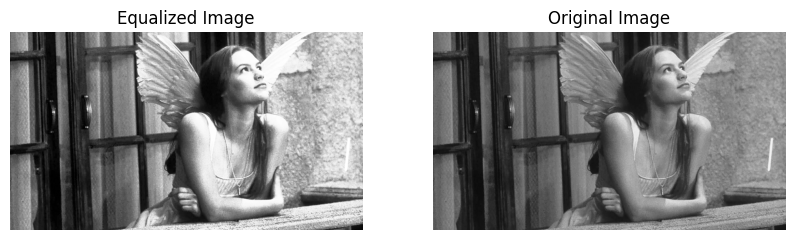

In [72]:
#TASK8
#8.1
image_path = '/content/drive/MyDrive/21201307_momtaheena_chowdhury_l2-463/4.jpeg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

equalized_image = cv2.equalizeHist(image)


plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 2)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

# notun
plt.subplot(1, 2, 1)
plt.title('Equalized Image')
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')

plt.show()



Observation:Histogram equalisation improves contrast and makes features more visible in low contrast images by reordering pixel magnitudes so that bright areas are darker and dark areas are brighter.



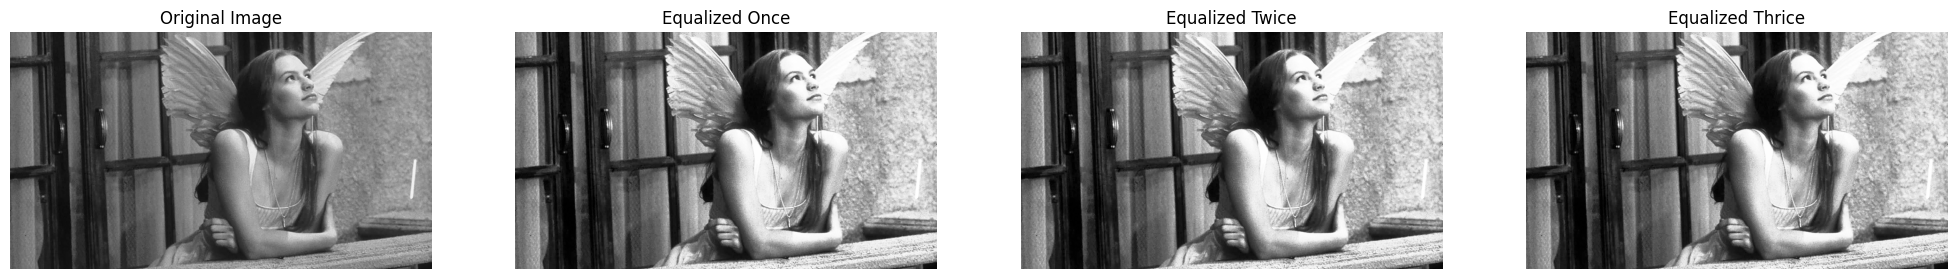

In [73]:
#8.2

equalized_once = cv2.equalizeHist(image)
equalized_twice = cv2.equalizeHist(equalized_once)
equalized_thrice = cv2.equalizeHist(equalized_twice)

plt.figure(figsize=(25, 25))

# Original image
plt.subplot(1, 4, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

#  once
plt.subplot(1, 4, 2)
plt.title('Equalized Once')
plt.imshow(equalized_once, cmap='gray')
plt.axis('off')

#  twice
plt.subplot(1, 4, 3)
plt.title('Equalized Twice')
plt.imshow(equalized_twice, cmap='gray')
plt.axis('off')

# thrice
plt.subplot(1, 4, 4)
plt.title('Equalized Thrice')
plt.imshow(equalized_thrice, cmap='gray')
plt.axis('off')

plt.show()


Observation:When histogram equalisation is applied repeatedly, the effect wears off and the image may show artefacts or over-enhancement, which causes the image to lose details.